In [29]:
# Install arules and arulesViz packages if not installed
install.packages("arules")


library(arules)
library(arulesViz)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
# Install arules if it's not already installed
if (!require(arules)) {
    install.packages("arules", dependencies = TRUE)
    library(arules)
}


Loading required package: arules

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [12]:
# Load your dataset (assuming it's already preprocessed)
df <- read.csv("/content/cleaned_data.csv")



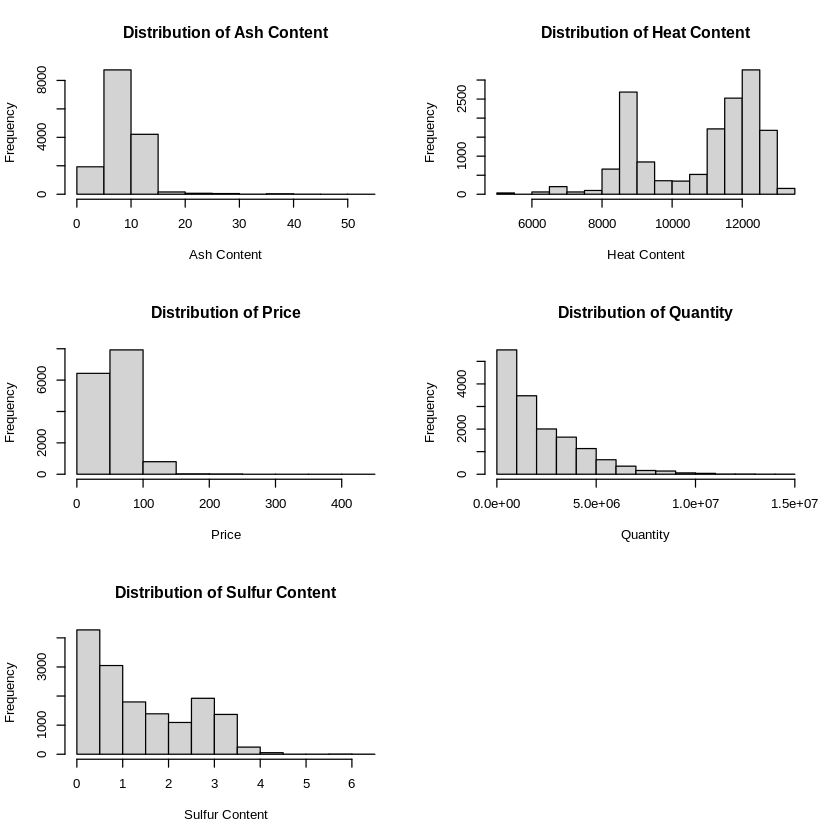

In [13]:
# Plotting histograms to understand distributions
par(mfrow=c(3,2))
hist(df$ash.content, main="Distribution of Ash Content", xlab="Ash Content")
hist(df$heat.content, main="Distribution of Heat Content", xlab="Heat Content")
hist(df$price, main="Distribution of Price", xlab="Price")
hist(df$quantity, main="Distribution of Quantity", xlab="Quantity")
hist(df$sulfur.content, main="Distribution of Sulfur Content", xlab="Sulfur Content")


In [14]:
# Manually defining bins for each numeric variable
df$ash_content_cat <- cut(df$ash.content, breaks=quantile(df$ash.content, probs=0:4/4, na.rm=TRUE), include.lowest=TRUE, labels=c("Low", "Medium", "High", "Very High"))
df$heat_content_cat <- cut(df$heat.content, breaks=quantile(df$heat.content, probs=0:4/4, na.rm=TRUE), include.lowest=TRUE, labels=c("Low", "Medium", "High", "Very High"))
df$price_cat <- cut(df$price, breaks=quantile(df$price, probs=0:4/4, na.rm=TRUE), include.lowest=TRUE, labels=c("Low", "Medium", "High", "Very High"))
df$quantity_cat <- cut(df$quantity, breaks=quantile(df$quantity, probs=0:4/4, na.rm=TRUE), include.lowest=TRUE, labels=c("Low", "Medium", "High", "Very High"))
df$sulfur_content_cat <- cut(df$sulfur.content, breaks=quantile(df$sulfur.content, probs=0:4/4, na.rm=TRUE), include.lowest=TRUE, labels=c("Low", "Medium", "High", "Very High"))

df

period,plantStateDescription,plant,plantName,rank,coalRankDescription,ash.content,heat.content,price,quantity,sulfur.content,ash_content_cat,heat_content_cat,price_cat,quantity_cat,sulfur_content_cat
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
2023,Pennsylvania (Bituminous),6249,Winyah,TOT,All,8.61,12125,63.14,1357855,2.60,Medium,High,High,Medium,Very High
2023,North Dakota,56786,Spiritwood Station,TOT,All,8.38,7237,43.23,76391,0.64,Medium,Low,Medium,Low,Medium
2023,Wyoming,8066,Jim Bridger,TOT,All,10.61,9215,64.26,4698553,0.54,Very High,Medium,High,Very High,Medium
2023,Texas,7902,Pirkey,LIG,Lignite,16.22,6610,47.26,738180,0.74,Very High,Low,Medium,Medium,Medium
2023,Ohio,6071,Trimble County,TOT,All,8.49,10985,49.04,3330230,2.44,Medium,Medium,Medium,Very High,Very High
2023,Illinois,6249,Winyah,BIT,Bituminous,8.61,12125,63.14,1357855,2.60,Medium,High,High,Medium,Very High
2023,New Mexico,8223,Springerville,TOT,All,9.51,9033,51.55,4435426,0.55,High,Medium,Medium,Very High,Medium
2023,Pennsylvania (Bituminous),8042,Belews Creek,BIT,Bituminous,10.38,12483,117.11,1044675,1.43,High,Very High,Very High,Medium,High
2023,Wyoming,6204,Laramie River Station,SUB,Subbituminous,4.81,8578,23.19,6647823,0.28,Low,Low,Low,Very High,Low


In [15]:
# Select only the categorical columns
df_for_arm <- df[,c("plantStateDescription", "rank", "coalRankDescription", "ash_content_cat", "heat_content_cat", "price_cat", "quantity_cat", "sulfur_content_cat")]

# Converting the data frame to a transaction format
transactions <- as(df_for_arm, "transactions")


Warning message:
“Column(s) 1, 2, 3 not logical or factor. Applying default discretization (see '? discretizeDF').”


In [16]:
summary(transactions)


transactions as itemMatrix in sparse format with
 15205 rows (elements/itemsets/transactions) and
 58 columns (items) and a density of 0.137931 

most frequent items:
                      rank=TOT        coalRankDescription=All 
                          7599                           7599 
                      rank=BIT coalRankDescription=Bituminous 
                          5245                           5245 
           ash_content_cat=Low                        (Other) 
                          3816                          92136 

element (itemset/transaction) length distribution:
sizes
    8 
15205 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      8       8       8       8       8       8 

includes extended item information - examples:
                         labels             variables  levels
1 plantStateDescription=Alabama plantStateDescription Alabama
2  plantStateDescription=Alaska plantStateDescription  Alaska
3 plantStateDescription=Arizona plantStateDescript

In [17]:
# Applying the Apriori algorithm
rules <- apriori(transactions, parameter = list(supp = 0.001, conf = 0.8, target = "rules"))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[58 item(s), 15205 transaction(s)] done [0.01s].
sorting and recoding items ... [54 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.02s].
writing ... [32339 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [18]:
#Top 15 rules by support
rules_sorted_support <- sort(rules, by = "support", decreasing = TRUE)
cat("Top 15 Rules by Support:\n")
inspect(head(rules_sorted_support, n = 15))


Top 15 Rules by Support:
     lhs                                 rhs                                support confidence  coverage     lift count
[1]  {coalRankDescription=All}        => {rank=TOT}                       0.4997698  1.0000000 0.4997698 2.000921  7599
[2]  {rank=TOT}                       => {coalRankDescription=All}        0.4997698  1.0000000 0.4997698 2.000921  7599
[3]  {coalRankDescription=Bituminous} => {rank=BIT}                       0.3449523  1.0000000 0.3449523 2.898951  5245
[4]  {rank=BIT}                       => {coalRankDescription=Bituminous} 0.3449523  1.0000000 0.3449523 2.898951  5245
[5]  {sulfur_content_cat=Low}         => {ash_content_cat=Low}            0.2270306  0.9062746 0.2505097 3.611086  3452
[6]  {ash_content_cat=Low}            => {sulfur_content_cat=Low}         0.2270306  0.9046122 0.2509701 3.611086  3452
[7]  {plantStateDescription=Wyoming}  => {ash_content_cat=Low}            0.2096021  0.8455824 0.2478790 3.369256  3187
[8]  {ash_conte

In [19]:
#Top 15 rules by confidence
rules_sorted_confidence <- sort(rules, by = "confidence", decreasing = TRUE)
cat("Top 15 Rules by Confidence:\n")
inspect(head(rules_sorted_confidence, n = 15))


Top 15 Rules by Confidence:
     lhs                                     rhs                               support confidence    coverage      lift count
[1]  {plantStateDescription=Arizona}      => {heat_content_cat=Medium}     0.001644196          1 0.001644196  4.003423    25
[2]  {plantStateDescription=Arizona}      => {quantity_cat=Very High}      0.001644196          1 0.001644196  4.000263    25
[3]  {plantStateDescription=Arizona}      => {sulfur_content_cat=Medium}   0.001644196          1 0.001644196  3.990814    25
[4]  {plantStateDescription=Alaska}       => {quantity_cat=Low}            0.001841500          1 0.001841500  3.999211    28
[5]  {plantStateDescription=Alaska}       => {heat_content_cat=Low}        0.001841500          1 0.001841500  3.996058    28
[6]  {plantStateDescription=Louisiana}    => {heat_content_cat=Low}        0.002038803          1 0.002038803  3.996058    31
[7]  {plantStateDescription=Maryland}     => {ash_content_cat=Very High}   0.002301874    

In [20]:

#Top 15 rules by lift
# Note: This has been done, but including for completeness
rules_sorted_lift <- sort(rules, by = "lift", decreasing = TRUE)
cat("Top 15 Rules by Lift:\n")
inspect(head(rules_sorted_lift, n = 15))


Top 15 Rules by Lift:
     lhs                               rhs                               support confidence    coverage     lift count
[1]  {heat_content_cat=Low,                                                                                           
      quantity_cat=High,                                                                                              
      sulfur_content_cat=Very High} => {plantStateDescription=Texas} 0.001052285  1.0000000 0.001052285 230.3788    16
[2]  {coalRankDescription=Lignite,                                                                                    
      ash_content_cat=Very High,                                                                                      
      price_cat=Low,                                                                                                  
      quantity_cat=High}            => {plantStateDescription=Texas} 0.001183821  1.0000000 0.001183821 230.3788    18
[3]  {rank=LIG,           

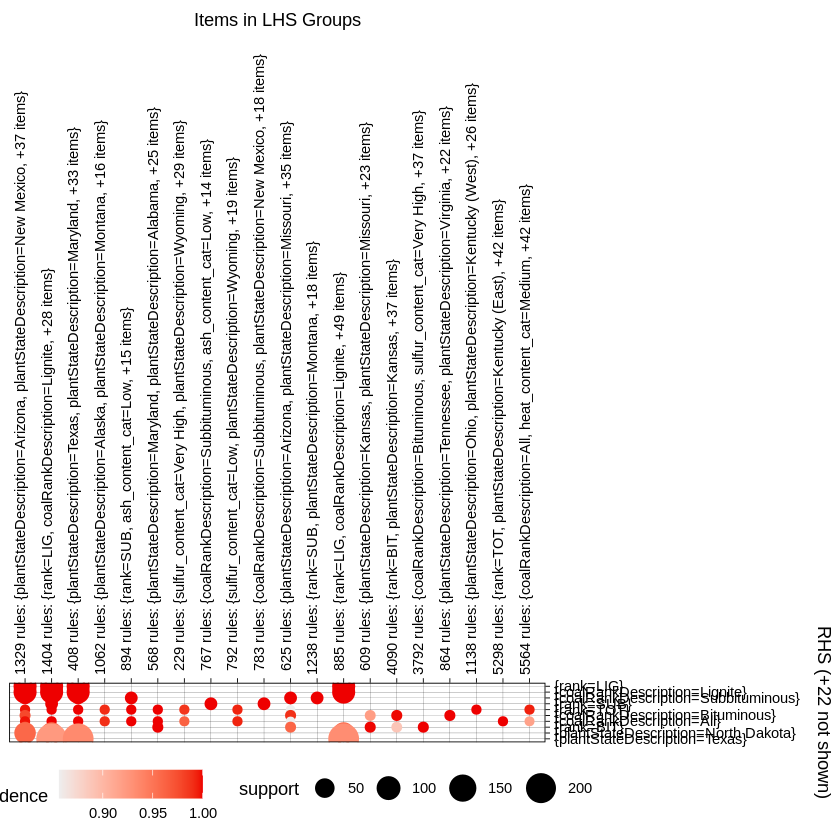

In [30]:
# Plotting the rules
plot(rules_sorted_lift, method = "grouped", measure = "lift", shading = "confidence")

